[View in Colaboratory](https://colab.research.google.com/github/karangautam/Learning-Samples/blob/master/fastai_lesson_1.ipynb)

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!pip install fastai

    100% |████████████████████████████████| 122kB 9.0MB/s 
    100% |████████████████████████████████| 1.5MB 11.1MB/s 
    100% |████████████████████████████████| 51kB 18.1MB/s 
    100% |████████████████████████████████| 51kB 17.0MB/s 
    100% |████████████████████████████████| 112kB 24.1MB/s 
    100% |████████████████████████████████| 3.4MB 10.3MB/s 
    100% |████████████████████████████████| 2.2MB 14.4MB/s 
    100% |████████████████████████████████| 184kB 25.1MB/s 


    99% |████████████████████████████████| 496.4MB 37.8MB/s eta 0:00:01

    100% |████████████████████████████████| 496.4MB 32kB/s 
    100% |████████████████████████████████| 61kB 12.9MB/s 
    100% |████████████████████████████████| 112kB 23.6MB/s 
    100% |████████████████████████████████| 13.7MB 2.0MB/s 
    100% |████████████████████████████████| 71kB 13.3MB/s 
    100% |████████████████████████████████| 92kB 23.0MB/s 
    100% |████████████████████████████████| 81kB 17.4MB/s 


  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built pandas-summary bcolz torchtext feather-format
plotnine 

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karangautam","key":"7886fb75a6cbe6a3bf59d84dcbab4904"}'}

In [7]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jul 15 13:16 kaggle.json


In [8]:
# Next, install the Kaggle API client.
!pip install -q kaggle

torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 /content/.kaggle/kaggle.json

In [11]:
# List available datasets.
!kaggle competitions list

ref                                              deadline             category            reward  teamCount  userHasEntered  
-----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
house-prices-advanced-regression-techniques      2030-01-01 00:00:00  Getting Started  Knowledge       4957            True  
digit-recognizer                                 2030-01-01 00:00:00  Getting Started  Knowledge       2688            True  
titanic                                          2030-01-01 00:00:00  Getting Started  Knowledge      10804            True  
imagenet-object-localization-challenge           2029-12-31 07:00:00  Research         Knowledge         20           False  
competitive-data-science-predict-future-sales    2019-01-01 23:59:00  Playground           Kudos        981           False  
flavours-of-physics-kernels-only                 2018-09-24 23:59:00  Playground       Knowledge         20           

In [12]:
!kaggle competitions list -s dogs

ref                                 deadline             category       reward  teamCount  userHasEntered  
----------------------------------  -------------------  ----------  ---------  ---------  --------------  
dogs-vs-cats                        2014-02-01 23:59:00  Playground       Swag        215            True  
dogs-vs-cats-redux-kernels-edition  2017-03-02 23:59:00  Playground  Knowledge       1314            True  
dog-breed-identification            2018-02-26 23:59:00  Playground      Kudos       1286            True  
seizure-prediction                  2014-11-17 23:59:00  Research      $25,000        504           False  


In [13]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition 

 93%|█████████████████████████████████████   | 251M/271M [00:02<00:00, 99.3MB/s]
100%|█████████████████████████████████████████| 271M/271M [00:02<00:00, 123MB/s]
 97%|██████████████████████████████████████▉ | 529M/544M [00:05<00:00, 79.5MB/s]
100%|████████████████████████████████████████| 544M/544M [00:05<00:00, 97.2MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 111k/111k [00:00<00:00, 78.5MB/s]


In [14]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/whale-categorization-playground/train/train"]).decode("utf8"))


sample_submission.csv
test.zip
train.zip



In [0]:
import zipfile
zip_ref = zipfile.ZipFile("../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train.zip", "r")
zip_ref.extractall("../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition")
zip_ref.close()

In [16]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/whale-categorization-playground/train/train"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train"]).decode("utf8"))

sample_submission.csv
test.zip
train
train.zip



In [0]:
import os, shutil

In [0]:
original_dataset_dir = '../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'

In [0]:
base_dir = '../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'                 
#os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'valid')                      
os.mkdir(validation_dir)
#test_dir = os.path.join(base_dir, 'test')                                  
#os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')                           
os.mkdir(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.mkdir(train_dogs_dir)  

In [0]:
validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.mkdir(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.mkdir(validation_dogs_dir)                                              

#test_cats_dir = os.path.join(test_dir, 'cats')                             
#os.mkdir(test_cats_dir)                                                    

#test_dogs_dir = os.path.join(test_dir, 'dogs')                             
#os.mkdir(test_dogs_dir) 

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)      

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)   

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                            
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)      

In [26]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
#print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
#print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 10000
total validation cat images: 2500
total training dog images: 10000
total validation dog images: 2500


In [0]:
PATH = '../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train/'
sz=224

In [28]:
torch.cuda.is_available()

True

In [29]:
torch.backends.cudnn.enabled

True

In [30]:
os.listdir(PATH)

['cat.2874.jpg',
 'dog.11652.jpg',
 'cat.5139.jpg',
 'cat.10554.jpg',
 'dog.6215.jpg',
 'cat.5488.jpg',
 'cat.4219.jpg',
 'cat.3690.jpg',
 'dog.5716.jpg',
 'dog.2936.jpg',
 'cat.7446.jpg',
 'dog.3379.jpg',
 'dog.9038.jpg',
 'cat.8999.jpg',
 'dog.7891.jpg',
 'cat.8218.jpg',
 'cat.10384.jpg',
 'dog.5033.jpg',
 'dog.7246.jpg',
 'dog.12250.jpg',
 'dog.4557.jpg',
 'cat.6246.jpg',
 'dog.8783.jpg',
 'cat.4357.jpg',
 'cat.6278.jpg',
 'dog.8276.jpg',
 'cat.11729.jpg',
 'dog.9060.jpg',
 'cat.11925.jpg',
 'cat.11523.jpg',
 'cat.9581.jpg',
 'dog.8696.jpg',
 'cat.5642.jpg',
 'cat.10236.jpg',
 'cat.6082.jpg',
 'cat.672.jpg',
 'cat.4801.jpg',
 'dog.9991.jpg',
 'cat.2031.jpg',
 'cat.8233.jpg',
 'dog.5833.jpg',
 'cat.9780.jpg',
 'cat.1136.jpg',
 'dog.5682.jpg',
 'cat.3284.jpg',
 'cat.4847.jpg',
 'dog.10102.jpg',
 'cat.8538.jpg',
 'dog.4480.jpg',
 'dog.6798.jpg',
 'dog.9189.jpg',
 'dog.11960.jpg',
 'dog.901.jpg',
 'dog.6212.jpg',
 'cat.3528.jpg',
 'dog.11183.jpg',
 'dog.3506.jpg',
 'cat.5040.jpg',
 'cat

In [31]:
os.listdir(f'{PATH}train')

['dogs', 'cats']

In [33]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.10554.jpg',
 'cat.10384.jpg',
 'cat.11729.jpg',
 'cat.11925.jpg',
 'cat.11523.jpg']

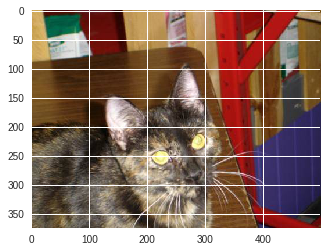

In [34]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [35]:
img.shape

(375, 499, 3)

In [36]:
img[:4,:4]

array([[[192, 154,  73],
        [196, 158,  77],
        [201, 163,  82],
        [205, 167,  86]],

       [[194, 156,  75],
        [196, 158,  77],
        [200, 162,  81],
        [204, 166,  85]],

       [[196, 158,  77],
        [197, 159,  78],
        [200, 162,  81],
        [203, 165,  84]],

       [[199, 160,  81],
        [199, 160,  81],
        [200, 161,  82],
        [202, 163,  84]]], dtype=uint8)

In [37]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 33854986.96it/s]


100%|██████████| 79/79 [00:34<00:00,  2.32it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.04998    0.030922   0.9888    
    1      0.036342   0.027867   0.9894    



[array([0.02787]), 0.9894]

In [38]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [39]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [40]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(5000, 2)

In [41]:
log_preds[:10]

array([[ -0.00032,  -8.0581 ],
       [ -0.00007,  -9.61344],
       [ -0.00001, -11.65904],
       [ -0.00001, -11.26306],
       [ -0.00001, -11.89016],
       [ -0.00038,  -7.88241],
       [ -0.00182,  -6.31191],
       [ -0.00002, -11.06013],
       [ -0.0001 ,  -9.18353],
       [ -0.00601,  -5.11677]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


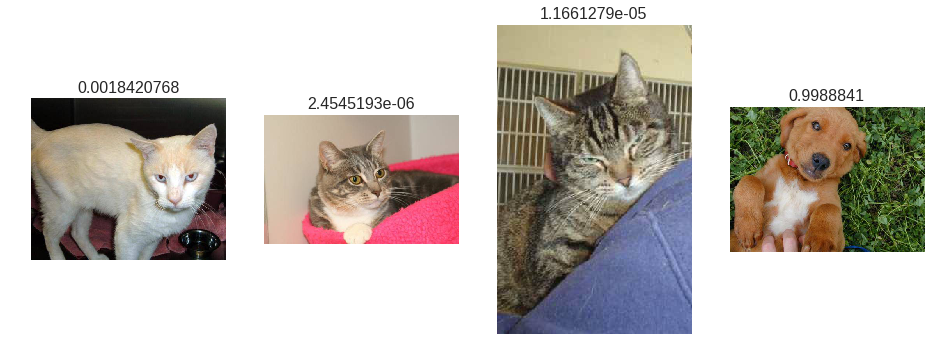

In [46]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


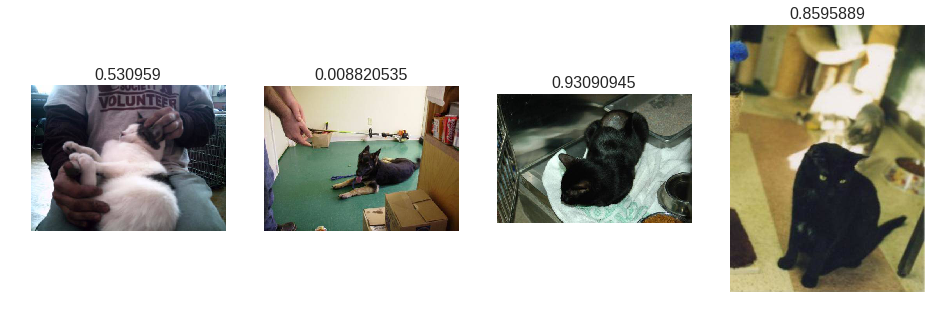

In [47]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


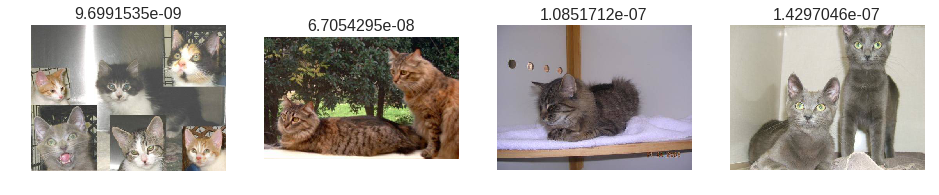

In [49]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


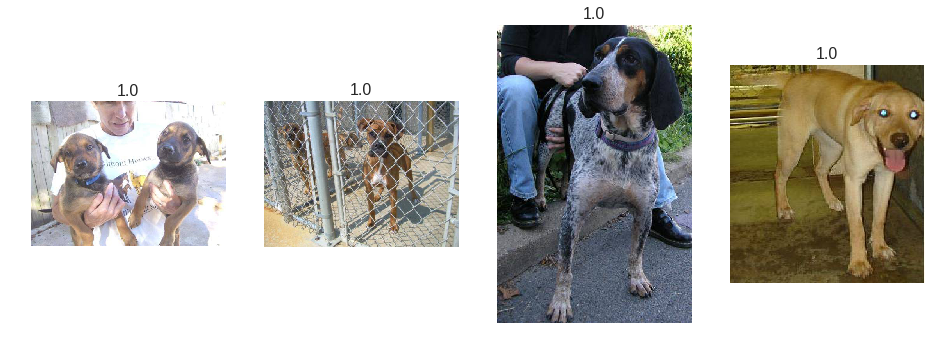

In [50]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


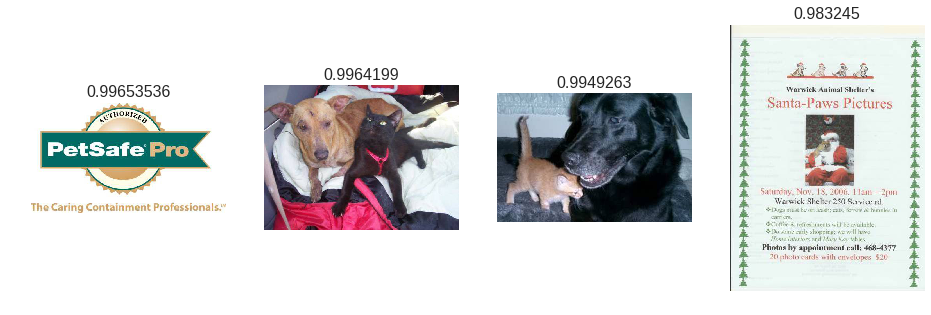

In [51]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


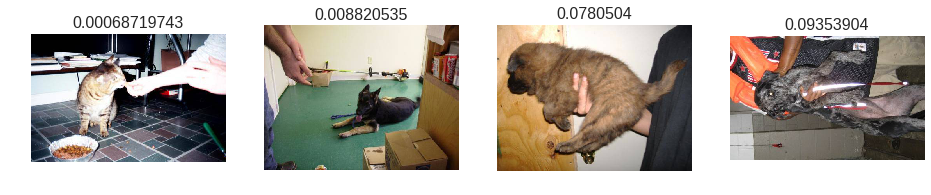

In [52]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


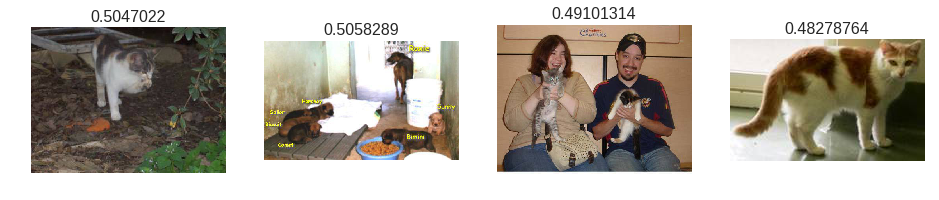

In [53]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [55]:
lrf=learn.lr_find()

 85%|████████▌ | 267/313 [00:06<00:01, 41.75it/s, loss=0.59] 


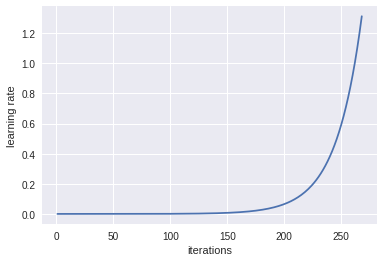

In [56]:
learn.sched.plot_lr()

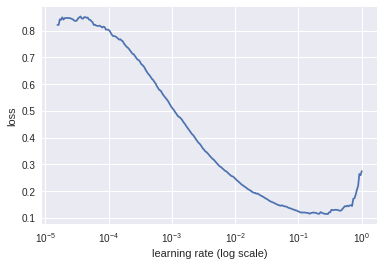

In [57]:
learn.sched.plot()

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

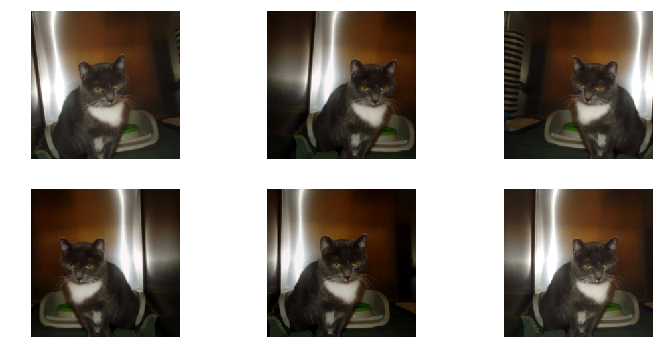

In [61]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [63]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.050433   0.031626   0.99      
    1      0.037065   0.02909    0.9898    



[array([0.02909]), 0.9898]

In [0]:
learn.precompute=False

In [66]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.040845   0.026084   0.9904    
 65%|██████▍   | 203/313 [01:41<00:55,  2.00it/s, loss=0.0425]

    1      0.039923   0.02804    0.9912    
    2      0.04036    0.027184   0.991     



[array([0.02718]), 0.991]

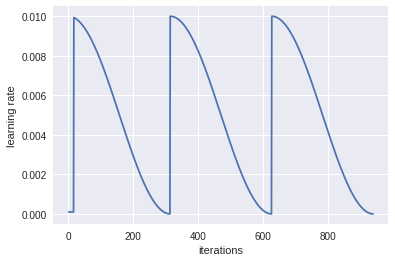

In [67]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

In [0]:
learn.unfreeze()

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [73]:


learn.fit(lr,  3,cycle_len =1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.060449   0.029294   0.9894    
 65%|██████▍   | 203/313 [03:28<01:53,  1.03s/it, loss=0.0391]

    1      0.040525   0.027445   0.9904    
    2      0.031017   0.026151   0.9912    
 21%|██        | 66/313 [01:08<04:17,  1.04s/it, loss=0.0354]

    3      0.02681    0.025352   0.9912    
    4      0.0205     0.025066   0.9908    
  3%|▎         | 10/313 [00:13<06:59,  1.39s/it, loss=0.0185]

    5      0.019619   0.027287   0.9904    
 95%|█████████▍| 296/313 [04:59<00:17,  1.01s/it, loss=0.0194]

    6      0.019251   0.025944   0.9912    



[array([0.02594]), 0.9912]

In [0]:
learn.sched.plot_lr()